from:
https://docs.pymc.io/notebooks/getting_started.html

We can simulate some artificial data from this model using only NumPy’s random module, and then use PyMC3 to try to recover the corresponding parameters. We are intentionally generating the data to closely correspond the PyMC3 model structure.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size) 
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma


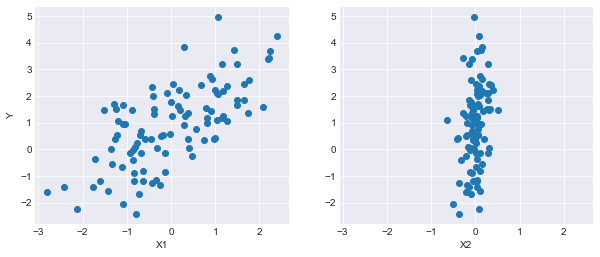

In [2]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

Specifying this model in PyMC3 is straightforward because the syntax is as close to the statistical notation. For the most part, each line of Python code corresponds to a line in the model notation above.

First, we import PyMC. We use the convention of importing it as pm.

In [3]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.7


first we create a new model object which is a container for the model random variables.



Following instantiation of the model, the subsequent specification of the model components is performed inside a with statement:

In [4]:
basic_model = pm.Model()

with basic_model:
    #random variable priors for the model
    #inside the with statement, these are automatically associated with basic_model
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    #expected outcome of variable
    mu = alpha + beta[0]*X1 + beta[1]*X2 +sigma
    
    #Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    

      

In [5]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

C:\Users\Reid\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -153.06, ||grad|| = 30.027: 100%|██████████████████████████████████████████████| 19/19 [00:00<00:00, 613.24it/s]


{'alpha': array(-0.05629733),
 'beta': array([0.94848479, 2.60712755]),
 'sigma_log__': array(-0.03771574),
 'sigma': array(0.96298664)}

In [ ]:
with basic_model:
    trace = pm.sample(500, chains=2)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


In [ ]:
print(trace['alpha'][-5:])
print(trace['beta'][-5:,0])
print(trace['beta'][-5:,1])
print(trace['sigma'][-5:])

In [ ]:
pm.traceplot(trace);

In [9]:
pm.summary(trace).round(2)

mean    sd  mc_error  hpd_2.5  hpd_97.5    n_eff  Rhat
alpha   -0.07  0.12      0.00    -0.31      0.15   631.55   1.0
beta__0  0.95  0.09      0.00     0.79      1.12   968.86   1.0
beta__1  2.59  0.52      0.02     1.53      3.52  1027.66   1.0
sigma    0.99  0.07      0.00     0.87      1.12   754.75   1.0